In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [61]:
# data load
df = sns.load_dataset("anscombe")

In [5]:
# head
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [6]:
# tail
df.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [10]:
# head가 어떻게 구현되어 있는지, 소스코드 출력
df.head??

In [16]:
# n=2 추출할 표본 개수, df에서 random Series 출력
df.sample(2)

,dataset,x,y
40,IV,19.0,12.50
8,I,12.0,10.84


In [21]:
# 추출할 표본 비율, n or frac 하나만 사용
df.sample(frac=0.1)

,dataset,x,y
20,II,7.0,7.26
16,II,14.0,8.10
37,IV,8.0,8.47
17,II,6.0,6.13


In [24]:
# random_state=42 : 같은 값을 출력
df.sample(random_state=42)

,dataset,x,y
37,IV,8.0,8.47


In [25]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [26]:
# describe : 수치형 데이터 기술통계
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [28]:
# describe : 범주형 데이터 기술통계
df.describe(include="object")

,dataset
count,44
unique,4
top,I
freq,11


## bool indexing을 이용해서 df 분할

In [33]:
# 고유값, 유일값 조회
df['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [32]:
df_1 = df[df['dataset'] == "I"]
df_2 = df[df['dataset'] == "II"]
df_3 = df[df['dataset'] == "III"]
df_4 = df[df['dataset'] == "IV"]

In [34]:
df_1.shape, df_2.shape, df_3.shape, df_4.shape 

((11, 3), (11, 3), (11, 3), (11, 3))

### 4개의 df의 mean, std가 상당히 유사

In [38]:
df_1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [39]:
df_2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [40]:
df_3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [41]:
df_4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


### 상관계수도 매우 유사

In [37]:
# .corr() : 상관계수
# 피어슨 상관계수가 기본값
# .corr 문서 보기
# df.corr??

df_1.corr()

,x,y
x,1.000000,0.816421
y,0.816421,1.000000


In [45]:
# df_2.corr
df_2.corr()

,x,y
x,1.000000,0.816237
y,0.816237,1.000000


In [47]:
# df_3.corr
df_3.corr()

,x,y
x,1.000000,0.816287
y,0.816287,1.000000


In [48]:
# df_4.corr
df_4.corr()

,x,y
x,1.000000,0.816521
y,0.816521,1.000000


## Series 빈도수

In [49]:
# value_counts()
df['dataset'].value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

In [50]:
# nobalize=True, 빈도 비율로 출력
df['dataset'].value_counts(normalize=True)

I      0.25
II     0.25
III    0.25
IV     0.25
Name: dataset, dtype: float64

## Groupby
* https://pandas.pydata.org/docs/user_guide/groupby.html

In [52]:
df.groupby??

In [53]:
df.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [54]:
df.groupby("dataset").mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


## Groupby 로 df 분할하지 않고 corr 출력

In [64]:
df.groupby('dataset')[["x", "y"]].corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

## seaborn 시각화

<AxesSubplot:xlabel='dataset', ylabel='count'>

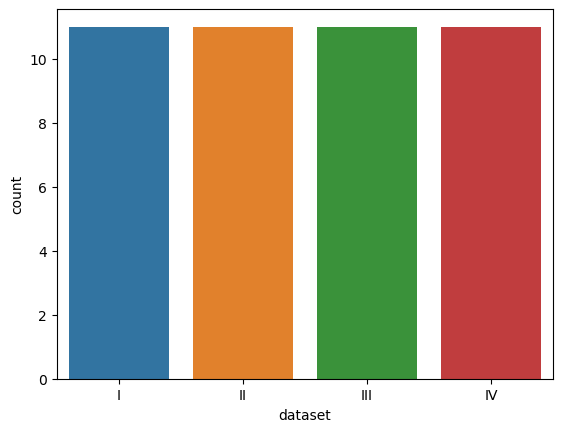

In [66]:
# countplot
sns.countplot(data=df, x="dataset")

<AxesSubplot:xlabel='count', ylabel='dataset'>

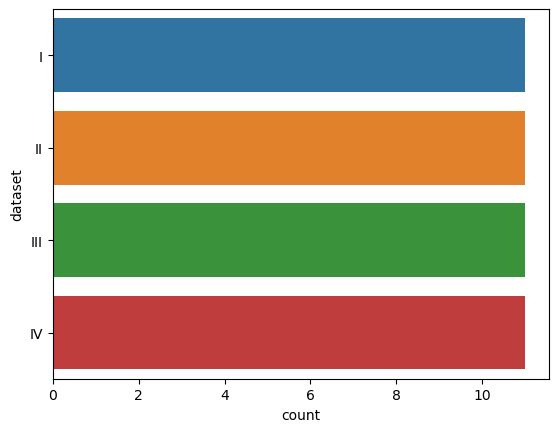

In [67]:
# 축 변경
sns.countplot(data=df, y="dataset")

<AxesSubplot:xlabel='dataset', ylabel='x'>

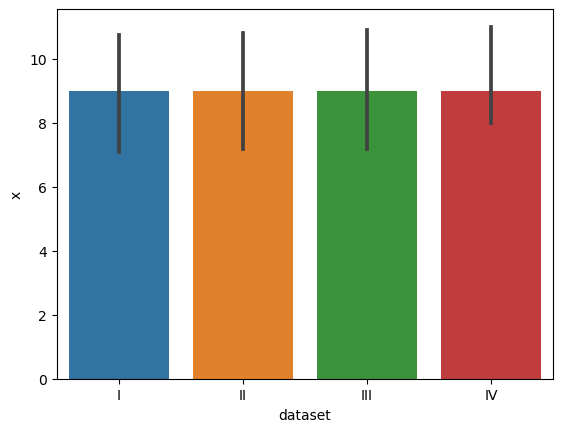

In [82]:
# 기본값 평균, estimator=np.mean
# 굉장히 큰 데이터를 시각화할 때 ci=None 해주면 속도 개선
sns.barplot(data=df, x="dataset", y="x")

In [72]:
sns.barplot??

<AxesSubplot:xlabel='dataset', ylabel='y'>

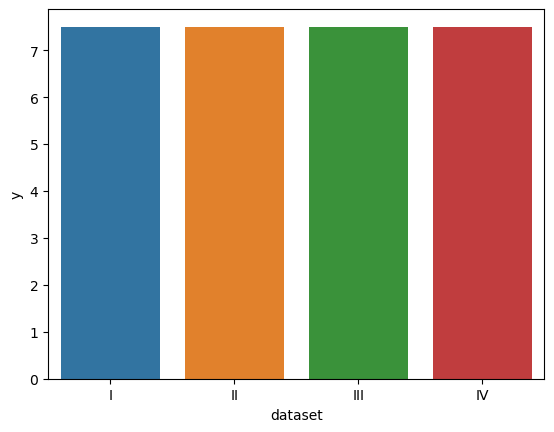

In [86]:
sns.barplot(data=df, x="dataset", y="y", ci=None)

<AxesSubplot:xlabel='dataset', ylabel='y'>

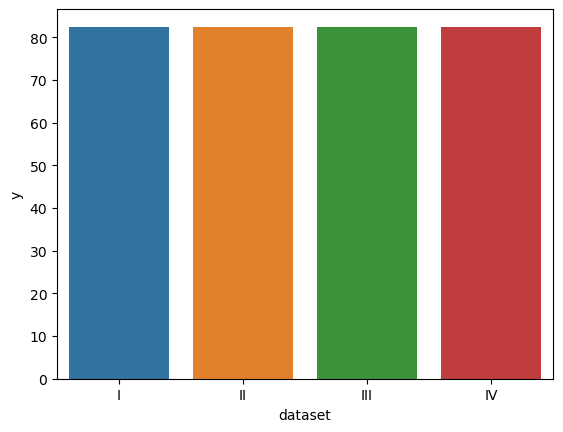

In [87]:
# 합계를 구하는 방법
sns.barplot(data=df, x="dataset", y="y", ci=None, estimator=np.sum)

In [88]:
df.groupby("dataset")[["x", "y"]].mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


<AxesSubplot:xlabel='dataset', ylabel='y'>

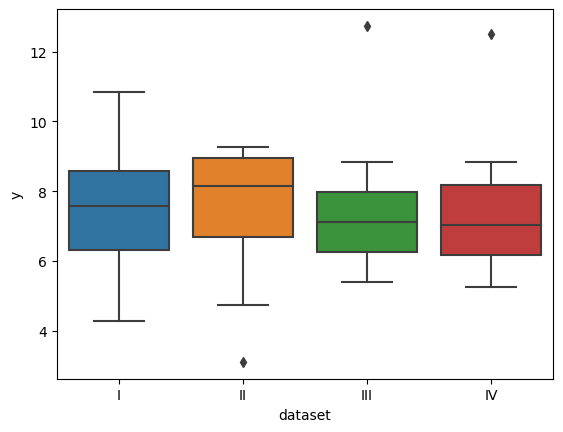

In [89]:
# boxplot
sns.boxplot(data=df, x="dataset", y="y")

In [91]:
pd.DataFrame.plot??

<AxesSubplot:xlabel='dataset', ylabel='y'>

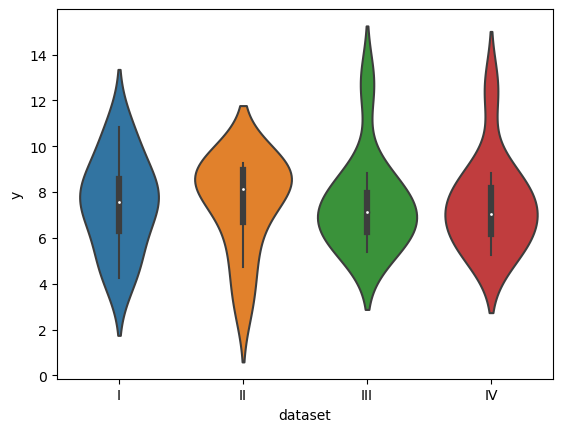

In [92]:
# violinplot
sns.violinplot(data=df, x="dataset", y="y")

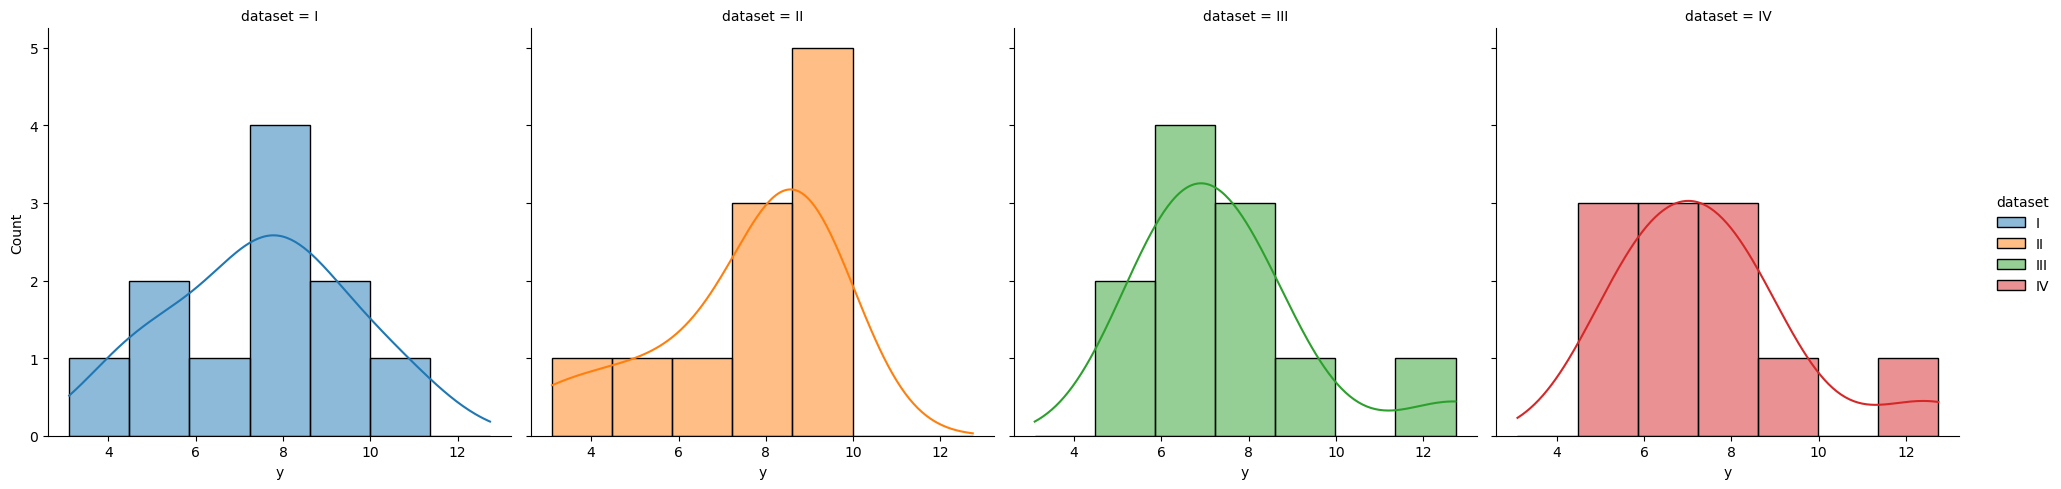

In [94]:
# displot
# kde : kdeplot
sns.displot(data=df, x="y", hue="dataset", kde=True, col="dataset")

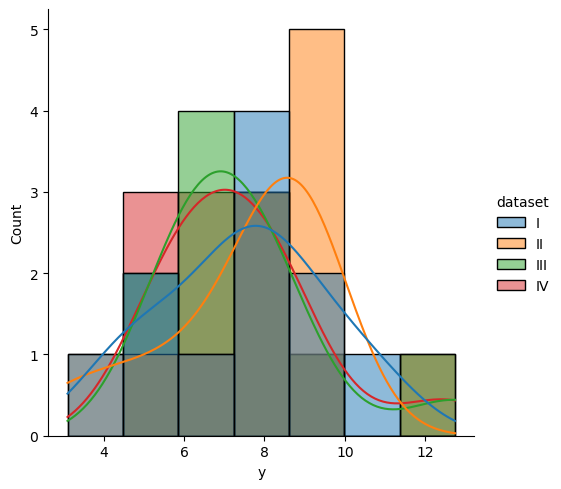

In [95]:
# 위 코드를 겹쳐 출력
sns.displot(data=df, x="y", hue="dataset", kde=True)

<AxesSubplot:xlabel='x', ylabel='y'>

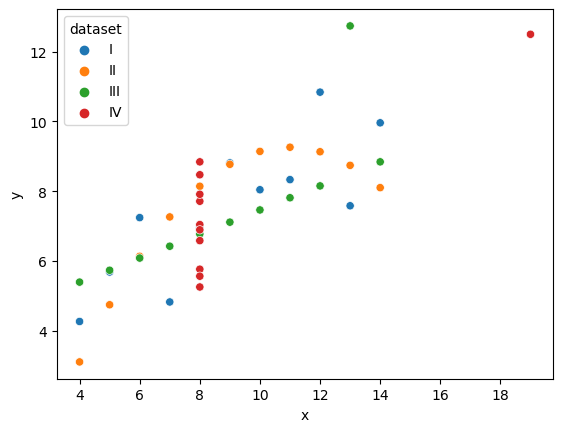

In [97]:
# scatterplot
sns.scatterplot(data=df, x="x", y="y", hue="dataset")

<AxesSubplot:xlabel='x', ylabel='y'>

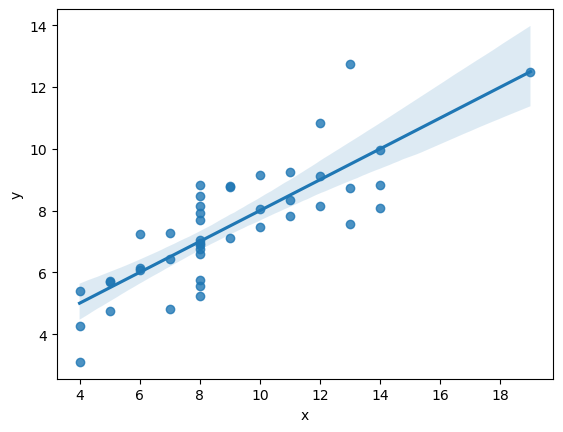

In [98]:
# regplot
# hue를 지원하지 않음
# https://seaborn.pydata.org/tutorial/regression.html : 회귀선 설명
sns.regplot(data=df, x="x", y="y")

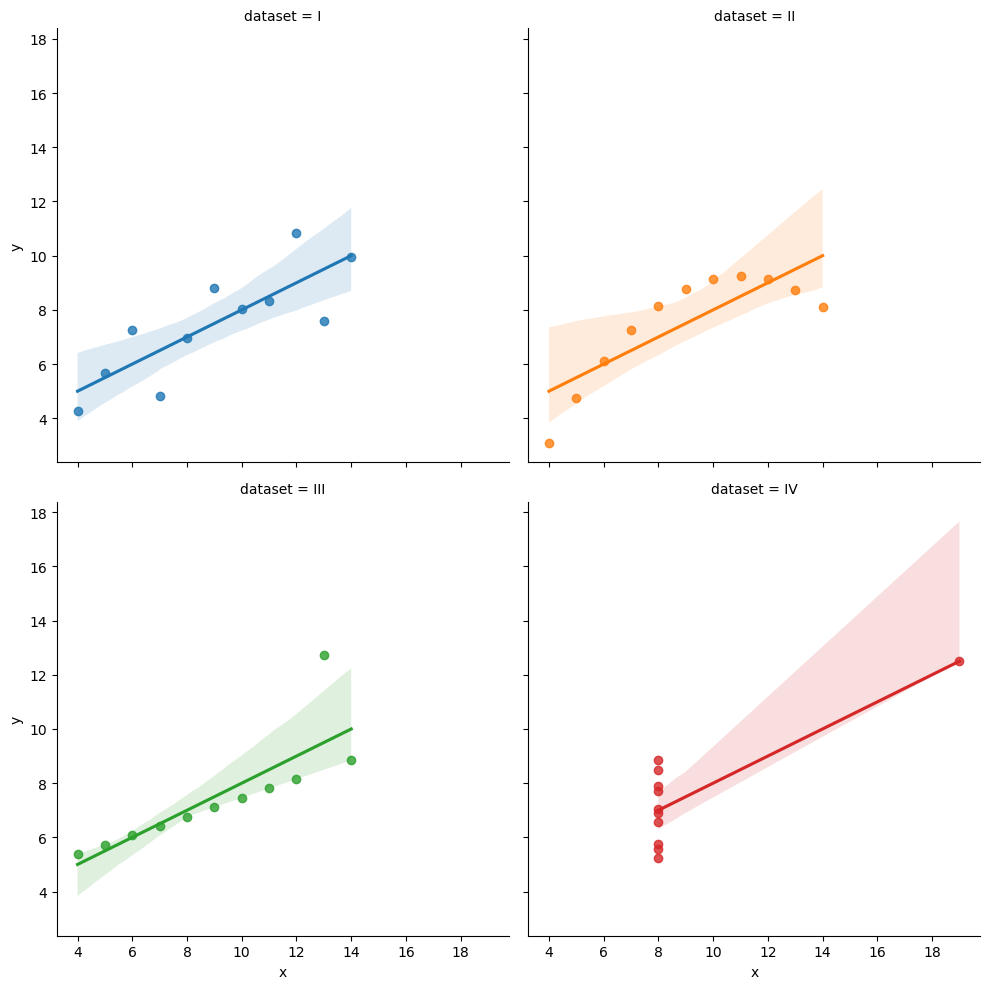

In [101]:
# lmplot
# hue 지원
# col_wrap=2 : 한 줄에 그래프 두 개 출력
sns.lmplot(data=df, x='x', y='y', hue='dataset', col='dataset', col_wrap=2)

/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/seaborn/regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


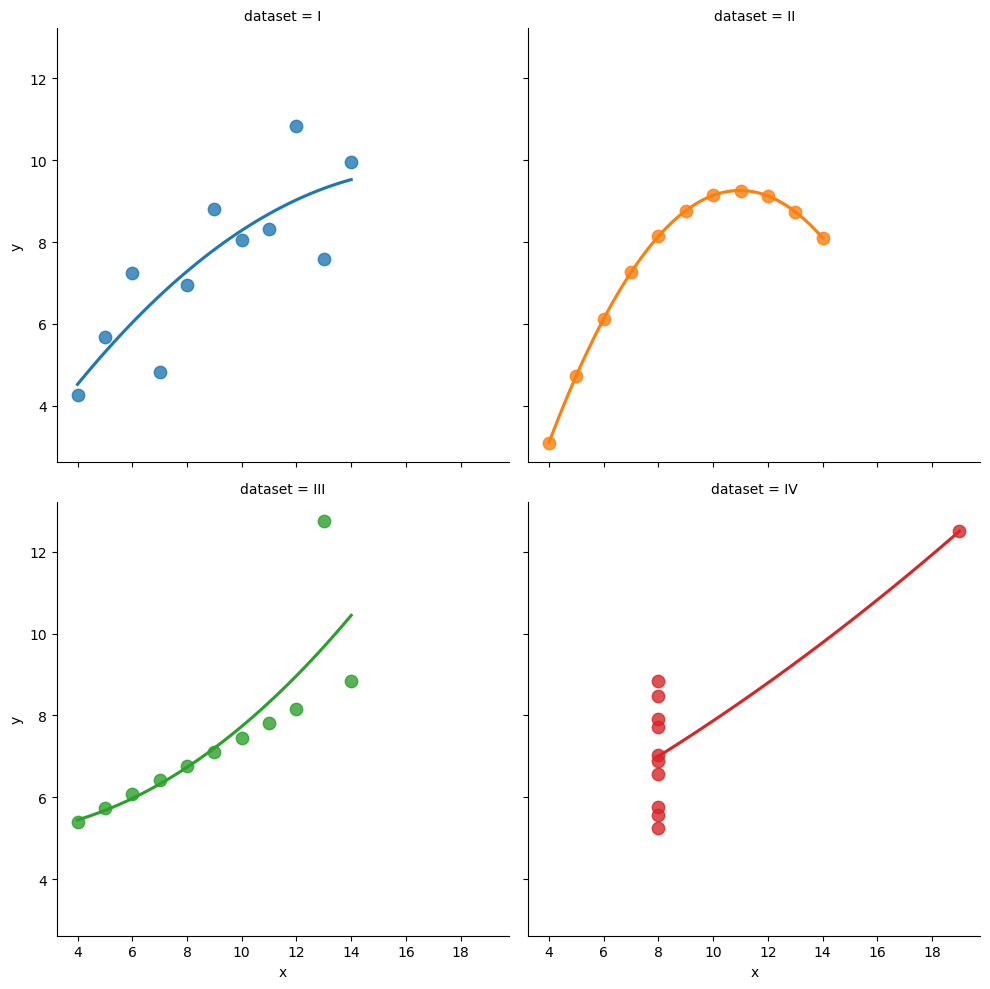

In [125]:
sns.lmplot(x="x", y="y", data=df, order=2, hue='dataset', ci=None, scatter_kws={"s": 80}, col="dataset", col_wrap=2)

In [110]:
sns.lmplot??